# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd

act_data = pd.read_csv("../data/act.csv")
sat_data = pd.read_csv("../data/sat.csv")

##### 2. Print the first ten rows of each dataframe.

In [2]:
act_data.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [3]:
sat_data.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

## ACT CSV Column Headers
__Unnamed__: Index of state

__State__: The states where data was collected

__Participation__: The percentages of how many students particpated in the SAT Exams

__English__: Mean scores for the "English" portion of the SATs

__Math__: Mean scores for the "Math" portion of the SATs

__Reading__: Mean scores for the "Reading" portion of the SATs

__Science__: Mean scores for the "Science" portion of the SATs

__Composite__: Mean scores of all of the tests


## SAT CSV Column Headers

__Unnamed__: Index of state

__State__: The states where data was collected

__Participation__: The percentages of how many students particpated in the SAT Exams

__Evidence-Based Reading and Writing__: Mean scores for the "Evidence-Based Reading and Writing" portion of the SATs

__Math__: Mean scores for the "Math" portion of the SATs

__Total__: The sum of the "Evidence-Based Reading and Writing" and "Math" mean scores

##### 4. Does the data look complete? Are there any obvious issues with the observations?

- Reread the articles and check the sample size
- https://blog.prepscholar.com/average-sat-scores-by-state-most-recent
- https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows

##### 5. Print the types of each column.

In [4]:
sat_data.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [5]:
act_data.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [6]:
def percentage_to_num(row):
    if type(row['Participation'])== str:
        return int(row['Participation'].replace("%",""))/100
    else:
        return row['Participation']

sat_data['Participation'] = sat_data.apply(lambda row: percentage_to_num(row), axis=1)

In [7]:
act_data['Participation'] = act_data.apply(lambda row: percentage_to_num(row), axis=1)

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [8]:
def map_to_column(data,column):    
    temp_dict = {}
    for idx, val in enumerate(data[column]):
        temp_dict[data["State"][idx]] = val
    return temp_dict

In [9]:
# SAT Data
sat_ebrw_dict = map_to_column(sat_data,'Evidence-Based Reading and Writing')
sat_math_dict = map_to_column(sat_data,'Math')
sat_total_dict = map_to_column(sat_data,'Total')

In [10]:
# ACT Data
act_english_dict = map_to_column(act_data,"English")
act_math_dict = map_to_column(act_data,"Math")
act_reading_dict = map_to_column(act_data,"Reading")
act_science_dict = map_to_column(act_data,"Science")
act_composite_dict = map_to_column(act_data,"Composite")

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [11]:
sat_header_state_dict = {}
for column_header in ['Evidence-Based Reading and Writing','Math','Total']:
    temp_list = []
    for val in sat_data[column_header]:
        temp_list.append(val)
    sat_header_state_dict[column_header] = temp_list

In [12]:
act_header_state_dict = {}
for column_header in ["English","Math","Reading","Science","Composite"]:
    temp_list = []
    for val in act_data[column_header]:
        temp_list.append(val)
    act_header_state_dict[column_header] = temp_list


##### 9. Merge the dataframes on the state column.

In [13]:
try:
    act_data.drop(columns=["Unnamed: 0"], inplace=True)
    sat_data.drop(columns=["Unnamed: 0"], inplace=True)
except:
    pass
    
merged_test_data = pd.merge(act_data, sat_data, how='inner', on="State")

In [14]:
merged_test_data.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [15]:
def modify_column_name(column_name):
    if column_name.find("_x") > -1 or column_name in ["Reading","Science","English","Composite"]:
        return f'act_{column_name.replace("_x","").lower()}'
    elif column_name.find("_y") > -1 or column_name in ["Evidence-Based Reading and Writing","Total"]:
        return f'sat_{column_name.replace("_y","").replace(" ","_").replace("-","_").lower()}'
    else:
        return column_name.lower()

new_columns_dict = {column: modify_column_name(column) for column in merged_test_data.columns}
merged_test_data.rename(index=str, columns=new_columns_dict, inplace=True)
merged_test_data.head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_evidence_based_reading_and_writing,sat_math,sat_total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [16]:
for column in merged_test_data.columns:
    if merged_test_data[column].dtypes != object:
        print(f"Min value for {column}: {merged_test_data[column].min()}")
        print(f"Min value for {column}: {merged_test_data[column].max()}")
        print()

Min value for act_participation: 0.08
Min value for act_participation: 1.0

Min value for act_english: 16.3
Min value for act_english: 25.5

Min value for act_math: 18.0
Min value for act_math: 25.3

Min value for act_reading: 18.1
Min value for act_reading: 26.0

Min value for act_science: 2.3
Min value for act_science: 24.9

Min value for act_composite: 17.8
Min value for act_composite: 25.5

Min value for sat_participation: 0.02
Min value for sat_participation: 1.0

Min value for sat_evidence_based_reading_and_writing: 482
Min value for sat_evidence_based_reading_and_writing: 644

Min value for sat_math: 52
Min value for sat_math: 651

Min value for sat_total: 950
Min value for sat_total: 1295



##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [17]:
import math 

## I ported this from some javascript that I put together from the prework...
# https://gist.git.generalassemb.ly/rajandavis/67d2a1c150eb931ed8cf6d0c1f4b5a42

## 1. find the mean
def get_mean(array_of_numbers):
    return sum(array_of_numbers) / len(array_of_numbers)

## 2. get differences of values and mean
def mean_diff(array_of_numbers):
    return list(map(lambda x:  x - get_mean(array_of_numbers), array_of_numbers))

## 3. square the results
def squared_mean_diff(array_of_numbers):
    return list(map(lambda x:  x ** 2, mean_diff(array_of_numbers)))

## 4. sum the squared results
def sum_of_squared_mean_diff(array_of_numbers):
    return sum(squared_mean_diff(array_of_numbers))

## 5. divide the summed results by (length of array - 1) => variance
def get_variance(array_of_numbers):
    return (sum_of_squared_mean_diff(array_of_numbers) / (len(array_of_numbers) - 1))

## 6. square root the variance to get the standard deviation
def get_standard_deviation(array_of_numbers):
    return math.sqrt(get_variance(array_of_numbers))

## Get all of the numeric columns for a data set
def get_numeric_columns(data_arr):
    return [column for column in data_arr.columns.where(data_arr.dtypes != object).dropna()]

## Create a dictionary of columns and their standard deviations
def std_dev_by_column(data_arr):
    numeric_columns = get_numeric_columns(data_arr)
    return {column: get_standard_deviation(data_arr[column]) for column in  numeric_columns}

# Print the standard deviations for each column
# For each data set
for std_data in [merged_test_data,sat_data,act_data]:
    # Note: ACT Standard Deviation Data
    # Will be slightly off
    # Due to having an extra row for "National"
    print(std_dev_by_column(std_data))
    print()

# add merged data to 'sd'
sd = [value for key,value in std_dev_by_column(merged_test_data).items()]

{'act_participation': 0.32140842015886834, 'act_english': 2.35367713980303, 'act_math': 1.9819894936505533, 'act_reading': 2.0672706264873146, 'act_science': 3.182462975155452, 'act_composite': 2.020694891154341, 'sat_participation': 0.35276632270013036, 'sat_evidence_based_reading_and_writing': 45.66690138768932, 'sat_math': 84.90911865855486, 'sat_total': 92.49481172519046}

{'Participation': 0.35276632270013036, 'Evidence-Based Reading and Writing': 45.66690138768932, 'Math': 84.90911865855486, 'Total': 92.49481172519046}

{'Participation': 0.3183251797460136, 'English': 2.332131774228897, 'Math': 1.9636016712608966, 'Reading': 2.048671533650611, 'Science': 3.151113069164709, 'Composite': 2.002083191096813}



## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [18]:
merged_test_data_copy = merged_test_data.copy()

# only modify once
if len(sd) == 10:
    sd = [""] + sd


merged_test_data.loc['std'] = sd

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [19]:
merged_test_data.sort_values(by=get_numeric_columns(merged_test_data), ascending=False).head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_evidence_based_reading_and_writing,sat_math,sat_total
23,Minnesota,1.0,20.4,21.5,21.8,21.6,21.5,0.03,644.0,651.0,1295.0
5,Colorado,1.0,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,1201.0
25,Missouri,1.0,19.8,19.9,20.8,20.5,20.4,0.03,640.0,631.0,1271.0
49,Wisconsin,1.0,19.7,20.4,20.6,20.9,20.5,0.03,642.0,649.0,1291.0
17,Kentucky,1.0,19.6,19.4,20.5,20.1,20.0,0.04,631.0,616.0,1247.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [20]:
merged_test_data.loc[merged_test_data["sat_participation"] > .5].head()

,state,act_participation,act_english,act_math,act_reading,act_science,act_composite,sat_participation,sat_evidence_based_reading_and_writing,sat_math,sat_total
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530.0,512.0,1041.0
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503.0,492.0,996.0
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482.0,468.0,950.0
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520.0,497.0,1017.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [21]:
import matplotlib.pyplot as plt

plt.hist(sat_data['Participation'])
plt.figure()
plt.hist(act_data['Participation']);

##### 17. Plot the Math(s) distributions from both data sets.

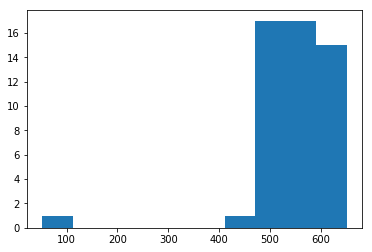

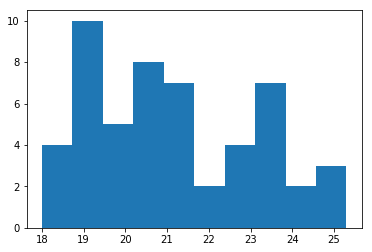

In [22]:
plt.hist(sat_data['Math'])
plt.figure()
plt.hist(act_data['Math']);

##### 18. Plot the Verbal distributions from both data sets.

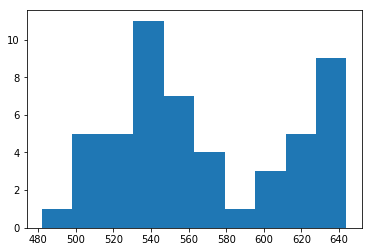

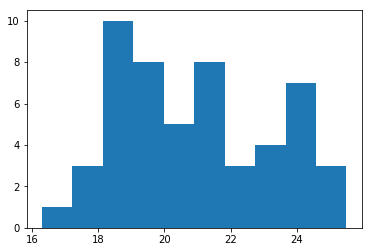

In [23]:
plt.hist(sat_data['Evidence-Based Reading and Writing'])
plt.figure()
plt.hist(act_data['English']);

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

That the means of random samples of the data will be normally distributed.

##### 20. Does this assumption hold true for any of our columns? Which?

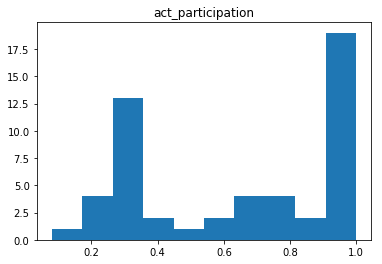

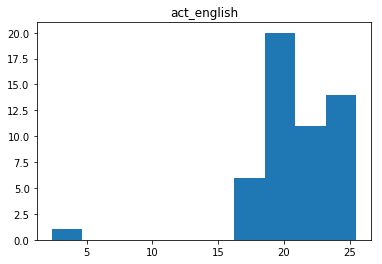

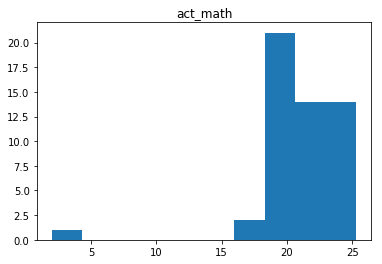

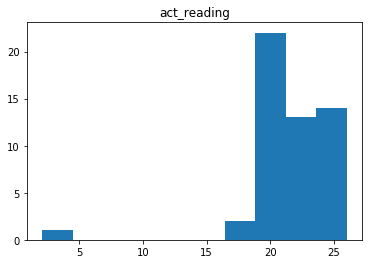

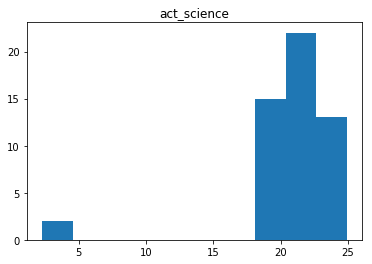

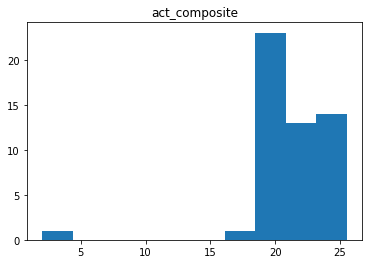

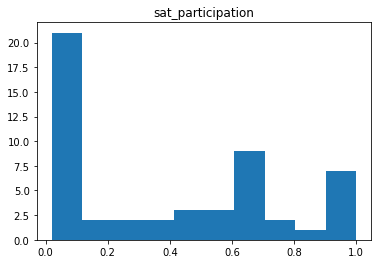

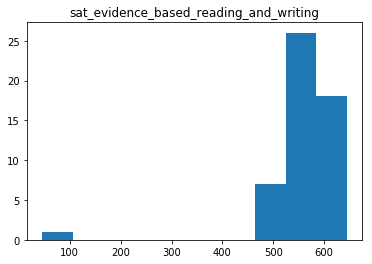

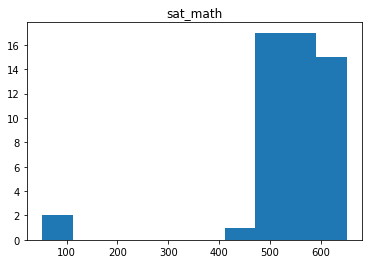

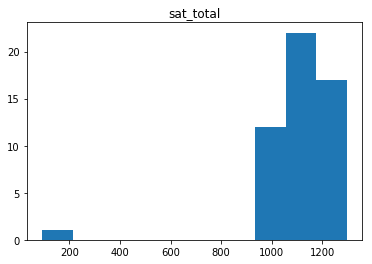

In [24]:
for idx,column in enumerate(merged_test_data_copy.columns):
    if idx > 0:
        plt.title(column)
        plt.hist(merged_test_data[column])
        if len(merged_test_data.columns) - 1 != idx:
            plt.figure()

##### 21. Plot some scatterplots examining relationships between all variables.

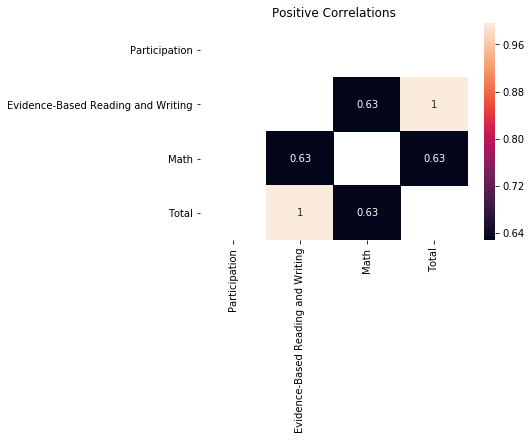

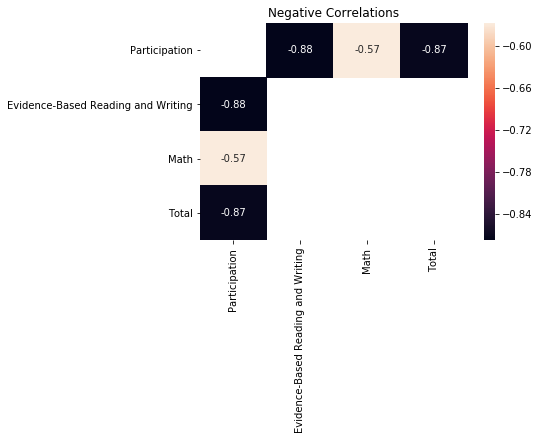

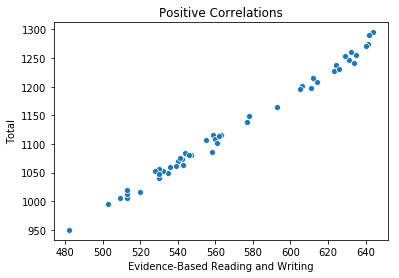

In [37]:
import seaborn as sns

# https://stackoverflow.com/a/32724156/2548452
sdc = sat_data.iloc[2:].corr()
ax = plt.axes()
sns.heatmap(sdc.where((sdc > .5) & (sdc != 1)), annot=True,ax=ax) 
ax.set_title("Positive Correlations");
plt.figure()
ax = plt.axes()
sns.heatmap(sdc.where(sdc < -.5), annot=True, ax=ax) 
ax.set_title("Negative Correlations")

plt.figure()
ax = plt.axes()
sns.scatterplot(sat_data['Evidence-Based Reading and Writing'],sat_data['Total'], ax=ax) 
ax.set_title("Positive Correlations");
# plt.figure()
# ax = plt.axes()
# sns.scatterplot(sdc['Evidence-Based Reading and Writing'],sdc['Total'], ax=ax) 
# ax.set_title("Negative Correlations")

Text(0.5,1,'Negative Correlations')

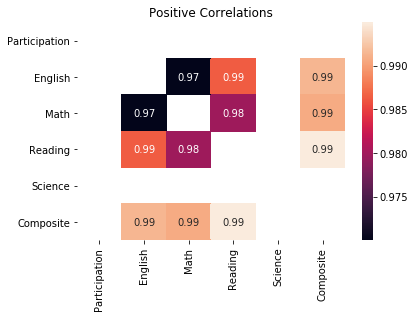

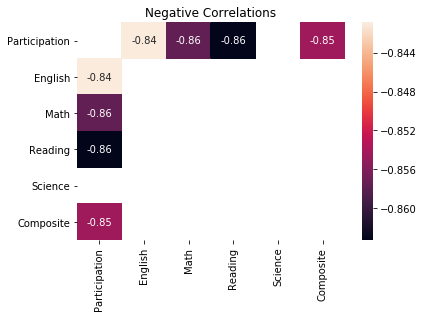

In [28]:
adc = act_data.iloc[2:].corr()
ax = plt.axes()
sns.heatmap(adc.where((adc > .5) & (adc != 1)), annot=True,ax=ax) 
ax.set_title("Positive Correlations");
plt.figure()
ax = plt.axes()
sns.heatmap(adc.where(adc < -.5), annot=True, ax=ax) 
ax.set_title("Negative Correlations")

##### 22. Are there any interesting relationships to note?

##### 23. Create box plots for each variable. 

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?